# Iris analysis

In [101]:
import pandas as pd
from sklearn.datasets import load_iris

#### Load the iris dataset from sklearn

In [102]:
iris = load_iris()
# print(iris)

#### Create a DataFrame from the data

In [103]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#### Add the target column (0, 1, 2)

In [104]:
df['target'] = iris.target

#### Map numerical target to species names

In [105]:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#### Save the dataset to CSV (inside data/ folder)

In [106]:
df.to_csv('../data/iris.csv', index=False)

#### Show first 5 rows

In [107]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Model 1 – Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [109]:
# Features and labels
X = df[iris.feature_names]      # All feature columns
y = df['species']               # Target: species names

In [110]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

In [112]:
# Train the model
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [113]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [114]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 1.00


In [115]:
import joblib
joblib.dump(log_reg, '../models/logistic_regression.pkl')


['../models/logistic_regression.pkl']

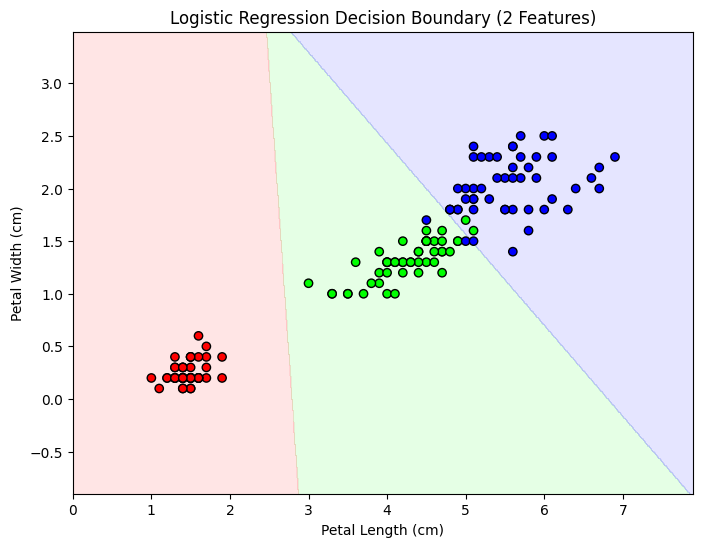

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select only 2 features for plotting
X_vis = df[['petal length (cm)', 'petal width (cm)']].values
y_vis = df['species'].values

# Encode labels to numbers for visualization
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_vis)

# Train logistic regression on just these 2 features
log_reg_vis = LogisticRegression(max_iter=200)
log_reg_vis.fit(X_vis, y_encoded)

# Create meshgrid to plot
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# Predict on meshgrid
Z = log_reg_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_encoded, cmap=cmap_points, edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Logistic Regression Decision Boundary (2 Features)')
plt.show()


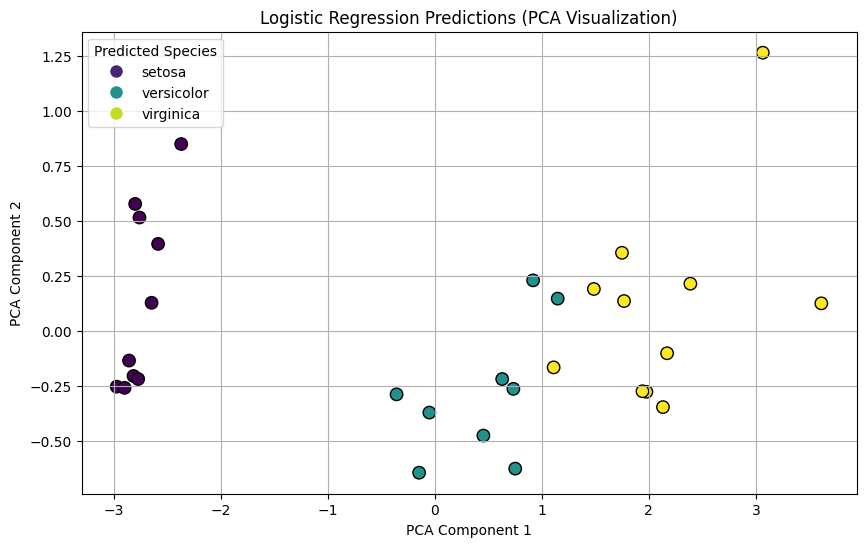

In [117]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Apply PCA on X_test to reduce to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Step 2: Get predictions from the model
y_pred = log_reg.predict(X_test)

# Step 3: Map true and predicted labels to colors
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Step 4: Plot
plt.figure(figsize=(10, 6))

# Plot the predicted points
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_encoded, cmap='viridis', edgecolors='k', s=80)
plt.title('Logistic Regression Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Legend using label encoder
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.viridis([0.1, 0.5, 0.9]))]
plt.legend(handles=handles, title="Predicted Species")
plt.savefig('../outputs/logistic_regression_pca_plot.png')
plt.show()


In [118]:
with open('../outputs/logistic_regression_accuracy.txt', 'w') as f:
    f.write(f"Logistic Regression Accuracy: {accuracy:.2f}")


In [119]:
import pandas as pd

pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

pred_df.to_csv('../outputs/logistic_regression_predictions.csv', index=False)



# Model 2 - KNN (K-Nearest Neighbors)

#### What is KNN?
KNN is a simple, intuitive classification method.
It looks at the K closest data points to a test point and assigns the most common class among them.

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)  # You can try k=5, k=7 too later

# Step 2: Train the model
knn.fit(X_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [121]:
# Step 3: Predict on test data
y_pred_knn = knn.predict(X_test)

# Step 4: Check accuracy
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


KNN Accuracy: 1.00


In [122]:
# Save the model
joblib.dump(knn, '../models/knn.pkl')
# Save accuracy to file
with open('../outputs/knn_accuracy.txt', 'w') as f:
    f.write(f"KNN Accuracy: {accuracy_knn:.2f}")

# Save predictions
import pandas as pd
df_knn_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})
df_knn_pred.to_csv('../outputs/knn_predictions.csv', index=False)

### ✅ Code to Visualize:


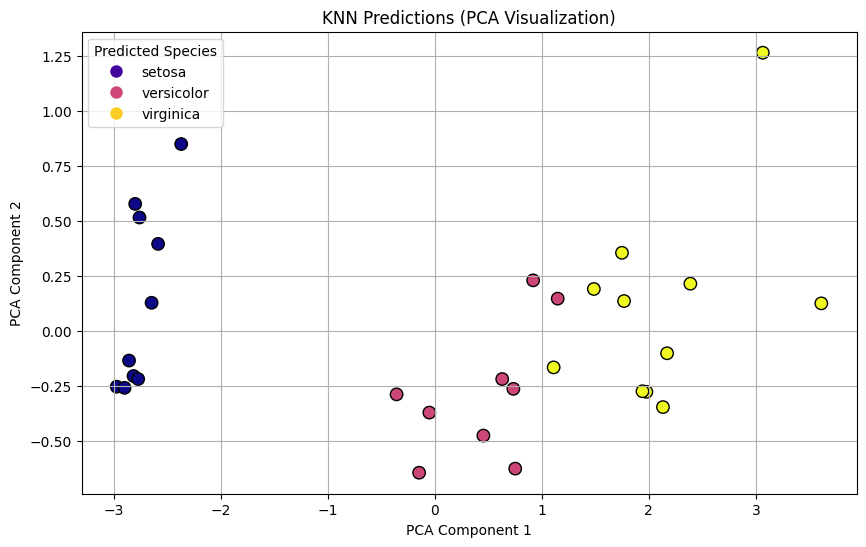

In [123]:
# Step 1: Reduce X_test to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Step 2: Encode predicted labels to color them
le = LabelEncoder()
y_pred_encoded = le.fit_transform(y_pred_knn)

# Step 3: Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                      c=y_pred_encoded, cmap='plasma', s=80, edgecolors='k')

plt.title('KNN Predictions (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Legend
classes = le.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=clr, markersize=10)
           for cls, clr in zip(classes, plt.cm.plasma([0.1, 0.5, 0.9]))]
plt.legend(handles=handles, title="Predicted Species")
plt.savefig('../outputs/knn_pca_plot.png')

plt.show()

#### 🧠 What is a Confusion Matrix?
Think of a confusion matrix like a report card for your model.

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

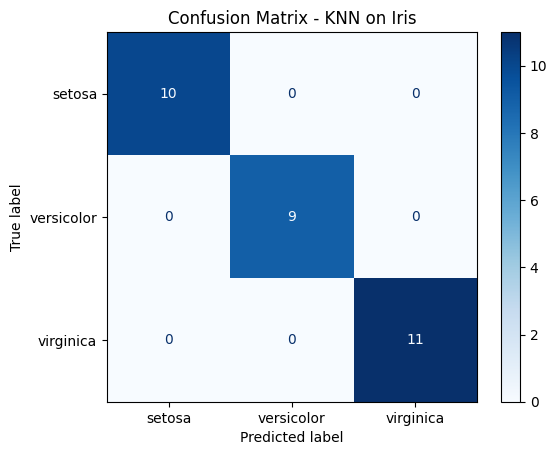

In [125]:
# Step 1: Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

# Step 2: Display it as a visual chart
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Step 3: Plot
disp.plot(cmap='Blues', values_format='d')  # 'd' = integer formatting
plt.title("Confusion Matrix - KNN on Iris")
plt.grid(False)
plt.savefig('../outputs/knn_confusion_matrix.png')
plt.show()

#### 🔍 Meaning:
✅ Diagonal Values → Correct Predictions:
Model predicted Setosa correctly 10 times

Predicted Versicolor correctly 9 times

Predicted Virginica correctly 11 times